In [10]:
# Import necessary libraries
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Set random seed for reproducibility
np.random.seed(42)

# Loading and Preprocessing
# The California Housing dataset can be loaded using fetch_california_housing from scikit-learn.

# Load the California Housing dataset
california = fetch_california_housing()

# Convert to pandas DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

In [12]:
# Data Exploration

# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

print("\nData types and missing values:")
print(df.info())

print("\nSummary statistics:")
display(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset shape: (20640, 9)

First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Summary statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010



Missing values per column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [13]:
# Preprocessing
# Split into features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [14]:
# 2. Regression Algorithm Implementation

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Evaluate a model and return performance metrics"""
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    metrics = {
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred)
    }
    
    return metrics



In [15]:
# Linear Regression
# Initialize and evaluate
lr = LinearRegression()
lr_metrics = evaluate_model(lr, X_train_scaled, X_test_scaled, y_train, y_test)

print("Linear Regression Performance:")
display(pd.DataFrame([lr_metrics]))

Linear Regression Performance:


,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,0.517933,0.555892,0.528628,0.5332,0.612551,0.575788


In [16]:
# Decision Tree Regressor
# Initialize and evaluate
dt = DecisionTreeRegressor(random_state=42)
dt_metrics = evaluate_model(dt, X_train_scaled, X_test_scaled, y_train, y_test)

print("Decision Tree Performance:")
display(pd.DataFrame([dt_metrics]))

Decision Tree Performance:


,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,1.035762e-31,0.493969,4.593655e-17,0.453904,1.0,0.623042


In [17]:
# Random Forest Regressor
# Initialize and evaluate
rf = RandomForestRegressor(random_state=42)
rf_metrics = evaluate_model(rf, X_train_scaled, X_test_scaled, y_train, y_test)

print("Random Forest Performance:")
display(pd.DataFrame([rf_metrics]))

Random Forest Performance:


,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,0.035338,0.25517,0.12208,0.327425,0.973565,0.805275


In [18]:
# Gradient Boosting Regressor
# Initialize and evaluate
gb = GradientBoostingRegressor(random_state=42)
gb_metrics = evaluate_model(gb, X_train_scaled, X_test_scaled, y_train, y_test)

print("Gradient Boosting Performance:")
display(pd.DataFrame([gb_metrics]))

Gradient Boosting Performance:


,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,0.260808,0.293999,0.356633,0.37165,0.804898,0.775643


In [19]:
# Support Vector Regressor (SVR)
# Initialize and evaluate
svr = SVR()
svr_metrics = evaluate_model(svr, X_train_scaled, X_test_scaled, y_train, y_test)

print("SVR Performance:")
display(pd.DataFrame([svr_metrics]))

SVR Performance:


,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
0,0.336132,0.357004,0.383119,0.398599,0.748551,0.727563


In [20]:
# 3. Model Evaluation and Comparison
results = pd.DataFrame({
    'Linear Regression': lr_metrics,
    'Decision Tree': dt_metrics,
    'Random Forest': rf_metrics,
    'Gradient Boosting': gb_metrics,
    'SVR': svr_metrics
}).T

# Display all results
display(results)

,Train MSE,Test MSE,Train MAE,Test MAE,Train R2,Test R2
Linear Regression,5.179331e-01,0.555892,5.286284e-01,0.533200,0.612551,0.575788
Decision Tree,1.035762e-31,0.493969,4.593655e-17,0.453904,1.000000,0.623042
Random Forest,3.533760e-02,0.255170,1.220798e-01,0.327425,0.973565,0.805275
Gradient Boosting,2.608083e-01,0.293999,3.566327e-01,0.371650,0.804898,0.775643
SVR,3.361317e-01,0.357004,3.831192e-01,0.398599,0.748551,0.727563


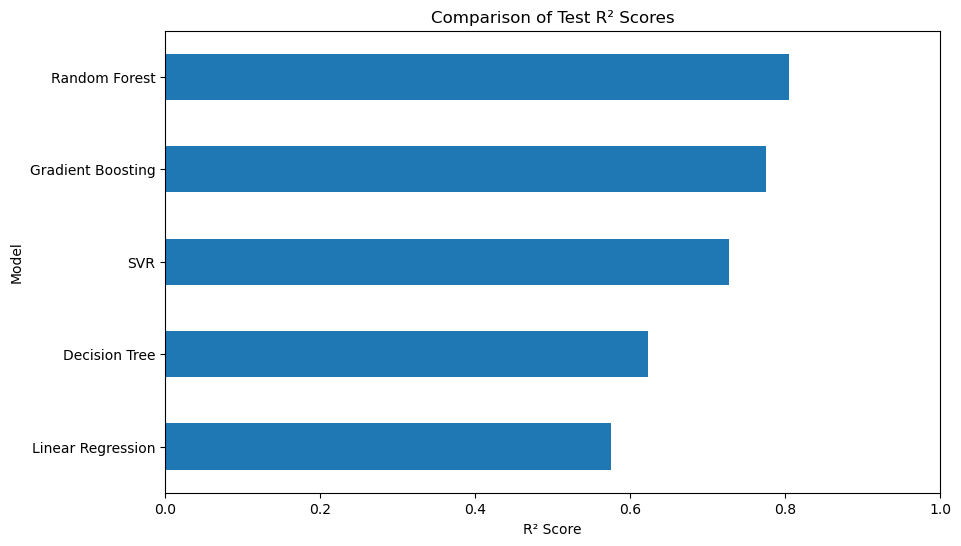

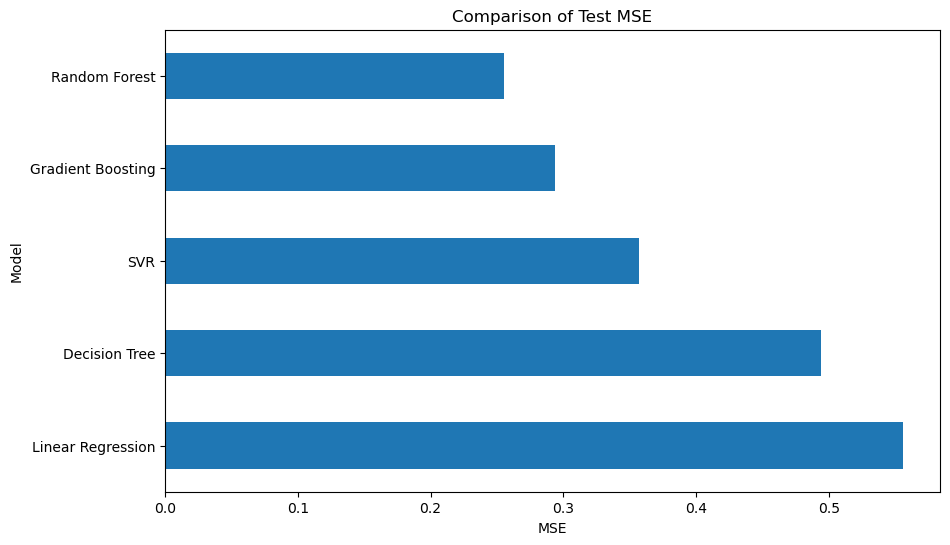

In [21]:
# Performance Comparison
# Plot comparison of Test R2 scores
plt.figure(figsize=(10, 6))
results['Test R2'].sort_values().plot(kind='barh')
plt.title('Comparison of Test R² Scores')
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

# Plot comparison of Test MSE
plt.figure(figsize=(10, 6))
results['Test MSE'].sort_values(ascending=False).plot(kind='barh')
plt.title('Comparison of Test MSE')
plt.xlabel('MSE')
plt.ylabel('Model')
plt.show()